In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os


In [2]:
base_dir=os.curdir + "\\images"

physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)


[]


In [3]:
IMAGE_SIZE=256
BATCH_SIZE=96

#pre-processing
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1)

test_datagen = ImageDataGenerator(  rescale=1./255,
                                    validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                subset='training')

test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,
                                                subset='validation')


Found 5359 images belonging to 18 classes.
Found 587 images belonging to 18 classes.


In [4]:
cnn = Sequential()
cnn.add(layers.Conv2D(filters=32, padding='same', strides=2, kernel_size=3, activation='relu', input_shape=(256,256,3)))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=64, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(layers.Conv2D(filters=128, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(18, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [5]:
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=100,
    jit_compile=True,
    name="RMSprop"), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [7]:

hist = cnn.fit(train_datagen, epochs=25, verbose=1, validation_data=test_datagen)

Epoch 1/25
56/56 [==============================] - 54s 970ms/step - loss: 2.0777 - accuracy: 0.3219 - val_loss: 1.9862 - val_accuracy: 0.3441
Epoch 2/25
56/56 [==============================] - 54s 963ms/step - loss: 1.7610 - accuracy: 0.4191 - val_loss: 1.6738 - val_accuracy: 0.4225
Epoch 3/25
56/56 [==============================] - 54s 962ms/step - loss: 1.5511 - accuracy: 0.5074 - val_loss: 1.4805 - val_accuracy: 0.5060
Epoch 4/25
56/56 [==============================] - 54s 964ms/step - loss: 1.4356 - accuracy: 0.5497 - val_loss: 1.2855 - val_accuracy: 0.6082
Epoch 5/25
56/56 [==============================] - 54s 966ms/step - loss: 1.3345 - accuracy: 0.5835 - val_loss: 1.4023 - val_accuracy: 0.5060
Epoch 6/25
56/56 [==============================] - 54s 960ms/step - loss: 1.2585 - accuracy: 0.6012 - val_loss: 1.4885 - val_accuracy: 0.5043
Epoch 7/25
56/56 [==============================] - 54s 960ms/step - loss: 1.2233 - accuracy: 0.6171 - val_loss: 1.3485 - val_accuracy: 0.6337

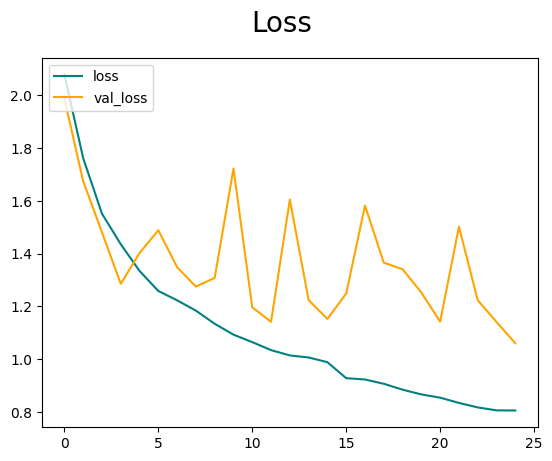

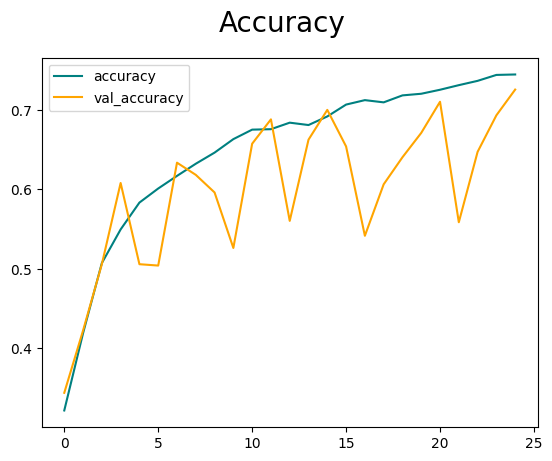

In [8]:
# Loss Plot
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Accuracy Plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [9]:
from tensorflow.keras.models import load_model

cnn.save(r'Saved_Model/model_04.h5')

C:\Users\forth\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
